# Data Science Capstone Project: Manufacturing Equipment Output Prediction with Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pickle
import scipy.stats as stats
import json

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [4]:
df=pd.read_csv(r"D:\MUFG\manufacturing_dataset_1000_samples.csv")

In [5]:
df


,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,2023-01-01 00:00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,2023-01-01 01:00:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,2023-01-01 02:00:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,2023-01-01 03:00:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,2023-01-01 04:00:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-02-11 11:00:00,211.6,131.1,39.2,10.2,400.0,26.2,10.4,3.3,32,Day,Type_C,Standard,Saturday,1.615,49.5,0.023,0.257,15.0
996,2023-02-11 12:00:00,236.6,114.6,22.8,11.3,348.3,21.2,12.0,67.6,43,Evening,Type_B,Standard,Thursday,2.064,34.2,0.442,0.159,49.6
997,2023-02-11 13:00:00,222.7,101.8,21.5,8.0,254.9,22.7,8.4,57.5,46,Evening,Type_C,Standard,Saturday,2.188,29.5,0.369,0.337,44.2
998,2023-02-11 14:00:00,300.0,112.6,26.7,10.2,122.6,21.1,9.3,120.0,48,Day,Type_A,Standard,Monday,1.849,36.8,0.760,0.291,57.7


In [6]:
df = df.drop(columns=["Timestamp"])

In [7]:
df.head()

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0


In [8]:
df.shape

(1000, 18)

In [9]:
df.isnull().sum()

Injection_Temperature          0
Injection_Pressure             0
Cycle_Time                     0
Cooling_Time                   0
Material_Viscosity            20
Ambient_Temperature           20
Machine_Age                    0
Operator_Experience           20
Maintenance_Hours              0
Shift                          0
Machine_Type                   0
Material_Grade                 0
Day_of_Week                    0
Temperature_Pressure_Ratio     0
Total_Cycle_Time               0
Efficiency_Score               0
Machine_Utilization            0
Parts_Per_Hour                 0
dtype: int64

In [10]:
df.columns

Index(['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time',
       'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature',
       'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Shift',
       'Machine_Type', 'Material_Grade', 'Day_of_Week',
       'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score',
       'Machine_Utilization', 'Parts_Per_Hour'],
      dtype='object')

In [11]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df[col]=df[col].fillna(df[col].median())

In [12]:
df.isnull().sum()

Injection_Temperature         0
Injection_Pressure            0
Cycle_Time                    0
Cooling_Time                  0
Material_Viscosity            0
Ambient_Temperature           0
Machine_Age                   0
Operator_Experience           0
Maintenance_Hours             0
Shift                         0
Machine_Type                  0
Material_Grade                0
Day_of_Week                   0
Temperature_Pressure_Ratio    0
Total_Cycle_Time              0
Efficiency_Score              0
Machine_Utilization           0
Parts_Per_Hour                0
dtype: int64

In [13]:
label=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=label.fit_transform(df[col])

In [14]:
df

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,1,1,0,4,1.625,42.3,0.063,0.510,36.5
1,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,2,0,2,6,1.655,48.5,0.037,0.389,29.9
2,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,0,0,2,1,1.922,29.4,0.061,0.551,56.9
3,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,1,0,1,2,2.215,52.3,0.054,0.293,31.0
4,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,2,1,1,1,1.691,54.9,0.145,0.443,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,211.6,131.1,39.2,10.2,400.0,26.2,10.4,3.3,32,0,2,2,2,1.615,49.5,0.023,0.257,15.0
996,236.6,114.6,22.8,11.3,348.3,21.2,12.0,67.6,43,1,1,2,4,2.064,34.2,0.442,0.159,49.6
997,222.7,101.8,21.5,8.0,254.9,22.7,8.4,57.5,46,1,2,2,2,2.188,29.5,0.369,0.337,44.2
998,300.0,112.6,26.7,10.2,122.6,21.1,9.3,120.0,48,0,0,2,1,1.849,36.8,0.760,0.291,57.7


In [15]:
df.dtypes

Injection_Temperature         float64
Injection_Pressure            float64
Cycle_Time                    float64
Cooling_Time                  float64
Material_Viscosity            float64
Ambient_Temperature           float64
Machine_Age                   float64
Operator_Experience           float64
Maintenance_Hours               int64
Shift                           int32
Machine_Type                    int32
Material_Grade                  int32
Day_of_Week                     int32
Temperature_Pressure_Ratio    float64
Total_Cycle_Time              float64
Efficiency_Score              float64
Machine_Utilization           float64
Parts_Per_Hour                float64
dtype: object

In [16]:
# Identify numerical columns (exclude categorical and target)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Parts_Per_Hour")

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Scaled numerical features successfully!")
print("\nScaled sample:")
df.head()


Scaled numerical features successfully!

Scaled sample:


,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,0.474090,1.359149,-0.856562,0.728050,1.708997,1.843582,-1.040282,-0.708301,0.838407,1,1,0,4,-0.951369,-0.627335,-0.746396,0.783359,36.5
1,-0.168139,0.874835,-0.161894,0.901726,-0.491176,-0.124033,-0.270824,-0.887005,0.463560,2,0,2,6,-0.841954,0.088037,-0.896034,0.164471,29.9
2,0.624221,-0.011937,-1.910541,-1.052130,0.765278,0.859775,-0.937688,-0.766653,-0.223658,0,0,2,1,0.131838,-2.115771,-0.757907,0.993065,56.9
3,1.499987,-0.734998,0.401027,0.510955,-1.565775,1.114836,0.344743,-0.803123,-0.098710,1,0,1,2,1.200456,0.526491,-0.798194,-0.326548,31.0
4,-0.259886,0.642910,1.095695,-0.878454,0.644042,0.240341,-0.424715,-0.277951,-0.098710,2,1,1,1,-0.710657,0.826486,-0.274460,0.440669,15.0


In [17]:
target = "Parts_Per_Hour"
X = df.drop(columns=[target])  # features
y = df[target]                 # target


In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [19]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 17)
X_test shape: (200, 17)
y_train shape: (800,)
y_test shape: (200,)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:

# Predictions
y_pred = model.predict(X_test)


In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print(f"MSE : {mse:.3f}")   #lower mse---->model is good fit
print(f"RMSE: {rmse:.3f}")  #lower rmse---->model is good fit
print(f"R²  : {r2:.3f}")    # higher r2 score----> good fit----->1=perfect prediction---->0=model explains nothing 


Regression Metrics:
MSE : 13.752
RMSE: 3.708
R²  : 0.895


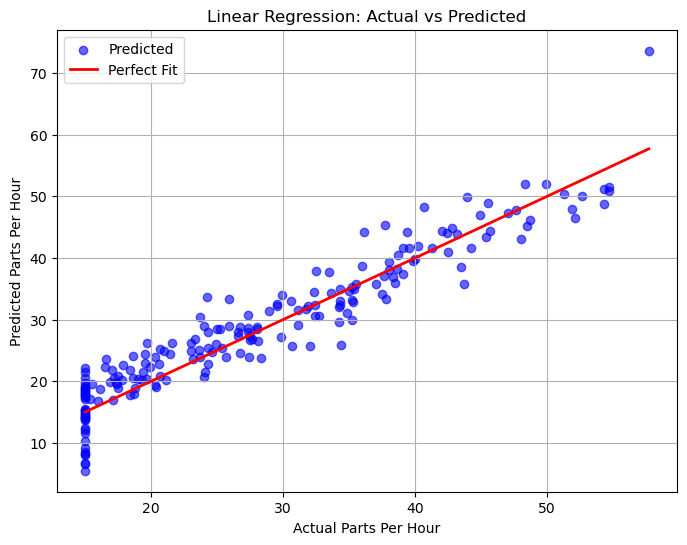

In [23]:
# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Parts Per Hour")
plt.ylabel("Predicted Parts Per Hour")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

c:\Users\HP\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


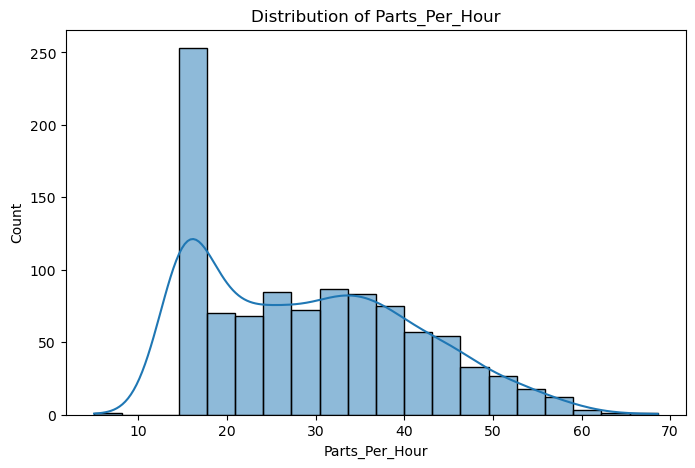

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df[target], bins=20, kde=True)
plt.title(f"Distribution of {target}")
plt.show()

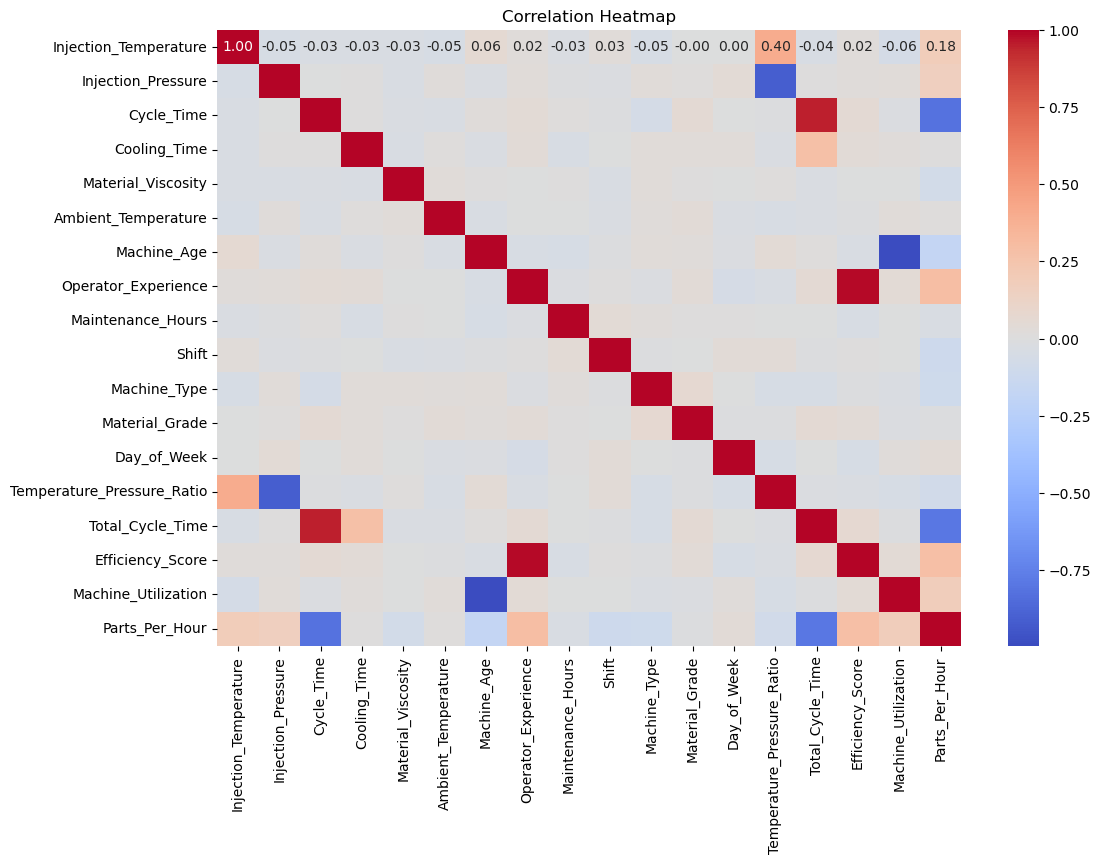

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

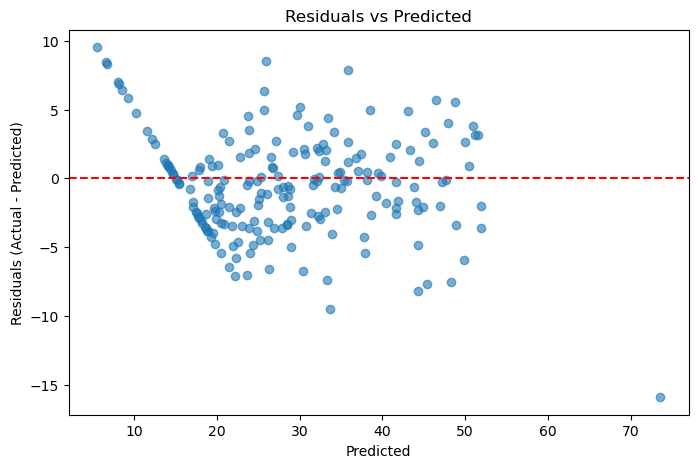

In [26]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()

In [27]:
#save the model
with open('linear_regression_model.pkl','wb')as f:
    pickle.dump(model,f)

with open("scaler.pkl","wb")as f:
    pickle.dump(scaler,f)

with open("feature_columns.json","w")as f:
   json.dump(X.columns.tolist(),f)

print("Model,scaler, and feature columns saved ")




Model,scaler, and feature columns saved 
